In [64]:
import pandas as pd
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

In [65]:
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_csv('/Users/liliamn/Desktop/final.csv')
df

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%),Income Level,Mean Government Education Expenditure Rate (%),Mean_GPI
0,Chad,TCD,Lowest,15.379128,24.5560,Low income,11.933025,2.576643
1,Afghanistan,AFG,Lowest,19.809310,16.3000,Low income,13.044702,3.306143
2,Mali,MLI,Lowest,20.470424,42.1000,Low income,16.659471,2.494071
3,Niger,NER,Lowest,20.530956,21.1555,Low income,16.770930,2.225214
4,Guinea,GIN,Lowest,22.271088,28.1000,Low income,12.861944,2.165071
5,Cuba,CUB,Highest,99.769315,12.3620,Upper middle income,15.123699,2.001071
6,Lithuania,LTU,Highest,99.777059,0.1500,High income,13.705299,1.691786
7,Estonia,EST,Highest,99.849846,4.8805,High income,13.668718,1.632643
8,Latvia,LVA,Highest,99.858515,4.8805,High income,14.311544,1.611214
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500,Low income,15.258061,2.931000


In [67]:
dependent_variable = 'Mean Adult Female Literacy Rate (%)'
independent_variables = ['Median Female Child Marriage Rate (%)', 'Income Level', 'Mean Government Education Expenditure Rate (%)', 'Mean_GPI']

In [68]:
# Drop rows with missing values in any of the selected columns
df_selected = df[[dependent_variable] + independent_variables].dropna()

In [69]:
df_selected[dependent_variable] = pd.to_numeric(df_selected[dependent_variable])
df_selected['Income Level'] = df_selected['Income Level'].astype('category')

In [70]:
df_encoded = pd.get_dummies(df_selected, drop_first=True)
df_encoded

,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%),Mean Government Education Expenditure Rate (%),Mean_GPI,Income Level_Low income,Income Level_Upper middle income
0,15.379128,24.5560,11.933025,2.576643,1,0
1,19.809310,16.3000,13.044702,3.306143,1,0
2,20.470424,42.1000,16.659471,2.494071,1,0
3,20.530956,21.1555,16.770930,2.225214,1,0
4,22.271088,28.1000,12.861944,2.165071,1,0
5,99.769315,12.3620,15.123699,2.001071,0,1
6,99.777059,0.1500,13.705299,1.691786,0,0
7,99.849846,4.8805,13.668718,1.632643,0,0
8,99.858515,4.8805,14.311544,1.611214,0,0
9,99.997612,0.0500,15.258061,2.931000,1,0


In [71]:
# Define the dependent variable
y = df_encoded[dependent_variable]

# Add a constant column for the intercept term
X = sm.add_constant(df_encoded.drop(columns=[dependent_variable]))

In [72]:
model = sm.OLS(y, X)
results = model.fit()

In [73]:
print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Mean Adult Female Literacy Rate (%)   R-squared:                       0.892
Model:                                             OLS   Adj. R-squared:                  0.758
Method:                                  Least Squares   F-statistic:                     6.627
Date:                                 Mon, 22 May 2023   Prob (F-statistic):             0.0454
Time:                                         10:05:38   Log-Likelihood:                -39.965
No. Observations:                                   10   AIC:                             91.93
Df Residuals:                                        4   BIC:                             93.75
Df Model:                                            5                                         
Covariance Type:                             nonrobust                                         
                                        

The Adjusted R-squared value is high (0.85) but the p-values for most of the coefficients are higher than 0.1, it suggests that the overall model explains a significant proportion of the variance in the dependent variable, but some of the individual independent variables may not have a statistically significant effect on the dependent variable.

A p-value above the chosen significance level (0.1 in our case(10%)) indicates that there is insufficient evidence to conclude a significant effect on the dependent variable.

Even if this is the case, this can happen when the combination of the non-significant variables collectively explains a large portion of the variation in the dependent variable, even though no single variable has a significant effect on its own (this is suggested by Prob (F-statistic):0.0454, below 0.05).

The limitation of the model is that the data available is limited.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                                         Variable         VIF
0                                           const  166.272038
1           Median Female Child Marriage Rate (%)    2.390632
2  Mean Government Education Expenditure Rate (%)    1.121114
3                                        Mean_GPI    4.428221
4                         Income Level_Low income    8.094600
5                Income Level_Upper middle income    1.727792


To explore the variables more, we need to know if there is multicolinearity among independent variables (multicollinearity refers to a situation in a regression model where two or more independent variables are strongly correlated with each other).

To check for multicollinearity in your regression model we calculate the variance inflation factor (VIF) for each independent variable. VIF measures the extent to which a predictor variable is linearly related to other predictor variables in the model. A high VIF value indicates high multicollinearity (as a rule of thumb, VIF values above 5 or 10 are often considered indicative of multicollinearity).

The VIF value for the intercept term is very high (166.272038), which is expected. This is because the intercept term is a constant and not a predictor variable. We can ignore the VIF value for the intercept term. 

The only variable that has significantly higher VIF value is Income Level_Low income, which is because it is a dummy variable connected to Income Level_Upper middle income. This result was also expected.

Overall, we can conclude that the model has explanatory power, as the variables in the model are jointly statistically significant. Moreover,the high Adjusted R-squared value of 0.75 suggests that approximately 75% of the variability in the dependent variable is explained by the independent variables in the model. This indicates a strong relationship between the independent variables and the dependent variable and suggests that the model is able to capture a significant portion of the variation in the data.

In [75]:
predicted_values = results.predict()
predicted_values

array([ 15.98328722,  36.39083491,   6.37195367,  46.84760094,
        14.31907523,  99.76931508, 104.80540977,  95.73010547,
        98.94990435,  78.54576597])

In [76]:
actual_values = df_encoded[dependent_variable]
actual_values

0    15.379128
1    19.809310
2    20.470424
3    20.530956
4    22.271088
5    99.769315
6    99.777059
7    99.849846
8    99.858515
9    99.997612
Name: Mean Adult Female Literacy Rate (%), dtype: float64

In [77]:
data = pd.DataFrame({'Country': df['Country Name'], 'Actual': actual_values, 'Predicted': predicted_values})

In [78]:
data_sorted = data.sort_values('Actual')
data_sorted

,Country,Actual,Predicted
0,Chad,15.379128,15.983287
1,Afghanistan,19.809310,36.390835
2,Mali,20.470424,6.371954
3,Niger,20.530956,46.847601
4,Guinea,22.271088,14.319075
5,Cuba,99.769315,99.769315
6,Lithuania,99.777059,104.805410
7,Estonia,99.849846,95.730105
8,Latvia,99.858515,98.949904
9,"Korea, Dem. People's Rep.",99.997612,78.545766


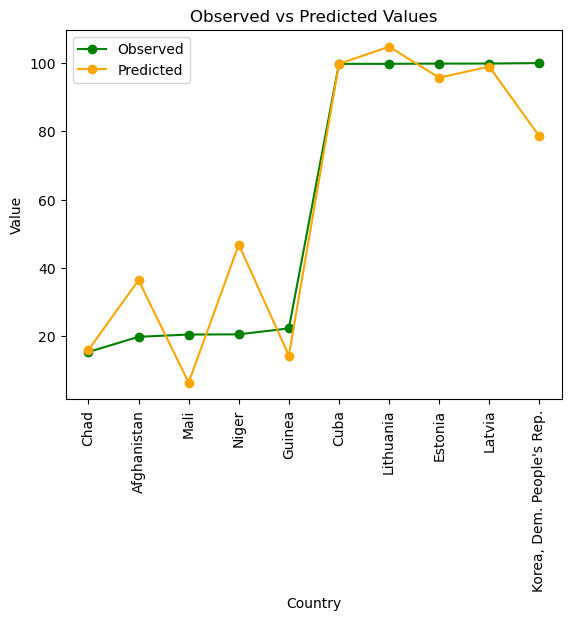

In [79]:
# Plotting the observed vs predicted values
plt.plot(data_sorted['Country'], data_sorted['Actual'], color='green', marker='o', label='Observed')
plt.plot(data_sorted['Country'], data_sorted['Predicted'], color='orange', marker='o', label='Predicted')

plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Observed vs Predicted Values')
plt.xticks(rotation=90) 
plt.legend()
plt.show()